# ***STROKE DISEASE PREDICTION***


**Objective of the study**

* The aim is to predict whether the person has stroke or not using Supervised Classification Based Algorithms

**About Dataset**
*  This dataset contains information on patients with lung cancer which includes there gender,age,hypertension,heart_disease,ever_married,     work_type,Residence_type,avg_glucose_level,bmi,smoking_status and stroke

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Data Science/Project/2/stroke (1).csv')
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df1.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [ ]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


**Observation** :

* Average age is 43
* Average glucose level is 106

**DATA PREPROCESSING**

In [ ]:
#Dropping unwanted columns
df=df1.drop(['ever_married','work_type','Residence_type'],axis=1)
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
4,Male,81.0,0,0,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,191.15,31.1,smokes,0
4978,Female,45.0,1,0,95.02,31.8,smokes,0
4979,Male,40.0,0,0,83.94,30.0,smokes,0


In [ ]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
df.drop(df[df.smoking_status=='Unknown'].index,inplace=True)

In [ ]:
df.drop(df[df.smoking_status=='formerly smoked'].index,inplace=True)
df

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
5,Male,74.0,1,1,70.09,27.4,never smoked,1
6,Female,69.0,0,0,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...
4975,Male,31.0,0,0,215.07,32.7,smokes,0
4977,Male,40.0,0,0,191.15,31.1,smokes,0
4978,Female,45.0,1,0,95.02,31.8,smokes,0
4979,Male,40.0,0,0,83.94,30.0,smokes,0


In [ ]:
#printing first five values
df.head()

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,105.92,32.5,never smoked,1
2,Female,49.0,0,0,171.23,34.4,smokes,1
3,Female,79.0,1,0,174.12,24.0,never smoked,1
5,Male,74.0,1,1,70.09,27.4,never smoked,1
6,Female,69.0,0,0,94.39,22.8,never smoked,1


In [ ]:
#Number of rows and columns
df.shape

(2614, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2614 entries, 1 to 4980
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2614 non-null   object 
 1   age                2614 non-null   float64
 2   hypertension       2614 non-null   int64  
 3   heart_disease      2614 non-null   int64  
 4   avg_glucose_level  2614 non-null   float64
 5   bmi                2614 non-null   float64
 6   smoking_status     2614 non-null   object 
 7   stroke             2614 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 183.8+ KB


In [ ]:
#Checking for missing values
df.isna().sum()  #therefore here no null values

gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
#printing datatypes
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# checking unique values of each column

list = ['gender','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status','stroke']

for i in list:
  print(df[i].unique(),i)
  print('-----------------------')

['Male' 'Female'] gender
-----------------------
[80. 49. 79. 74. 69. 81. 61. 54. 50. 64. 75. 60. 71. 52. 57. 82. 48. 76.
 39. 77. 73. 67. 78. 70. 63. 68. 45. 58. 53. 56. 72. 59. 55. 46. 32. 51.
 37. 40. 35. 20. 42. 44. 25. 38. 23. 66. 27. 43. 30. 29. 21. 18. 33. 24.
 47. 36. 41. 34. 26. 17. 31. 13. 22. 12. 65. 14. 28. 16. 15. 19. 62. 11.
 10.] age
-----------------------
[0 1] hypertension
-----------------------
[1 0] heart_disease
-----------------------
[105.92 171.23 174.12 ... 191.15  95.02  83.94] avg_glucose_level
-----------------------
[32.5 34.4 24.  27.4 22.8 29.7 36.8 27.3 28.2 30.9 37.5 25.8 37.8 22.4
 48.9 26.6 23.5 28.3 44.2 22.2 29.9 28.5 26.4 20.2 33.6 33.7 39.2 27.7
 31.4 33.2 32.8 25.3 47.5 28.9 27.  22.9 29.1 29.8 26.3 29.4 32.3 28.
 40.4 24.2 41.5 31.3 31.  31.7 35.8 28.4 36.5 20.1 26.7 38.7 25.  23.8
 21.8 30.  24.6 32.9 26.1 34.1 27.5 25.6 36.9 37.3 45.7 37.1 45.  30.8
 37.4 35.5 31.1 26.9 32.  23.4 30.7 20.5 21.5 27.1 40.  28.6 28.1 31.9
 29.6 35.4 16.9 35.9 42

In [ ]:
#Converting age values to the nearest whole numbers
df['age']=(df['age'].astype('int64'))
df['age']  #here age values are now converted into int datatype

1       80
2       49
3       79
5       74
6       69
        ..
4975    31
4977    40
4978    45
4979    40
4980    80
Name: age, Length: 2614, dtype: int64

# **DATA VISUALIZATION**

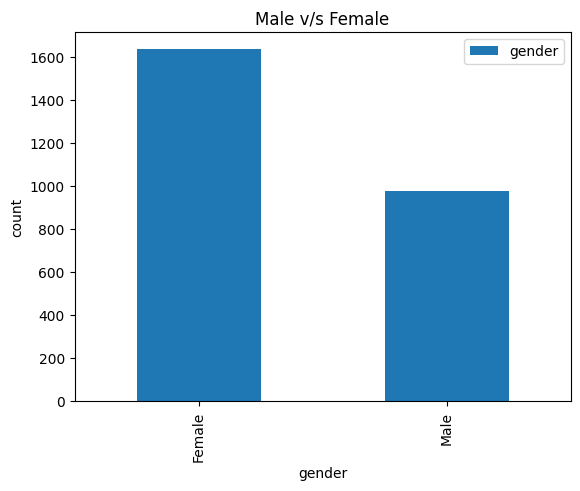

In [ ]:
#BAR DIAGRAM
#Male v/s Female
df['gender'].value_counts().plot.bar(title='Male v/s Female')
plt.xlabel('gender')
plt.ylabel('count')
plt.legend()

**Observation** :

Number of females are more compared to male

<Axes: xlabel='stroke', ylabel='age'>

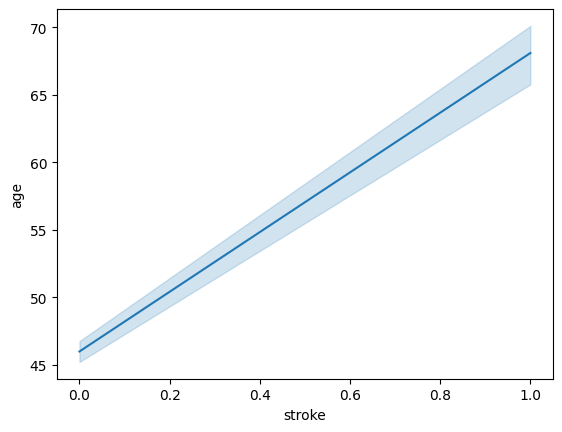

In [ ]:
#LINE PLOT
#Age v/s stroke
sns.lineplot(data=df,x='stroke',y='age')

OBSERVATION :

* Stroke increases with increase in age

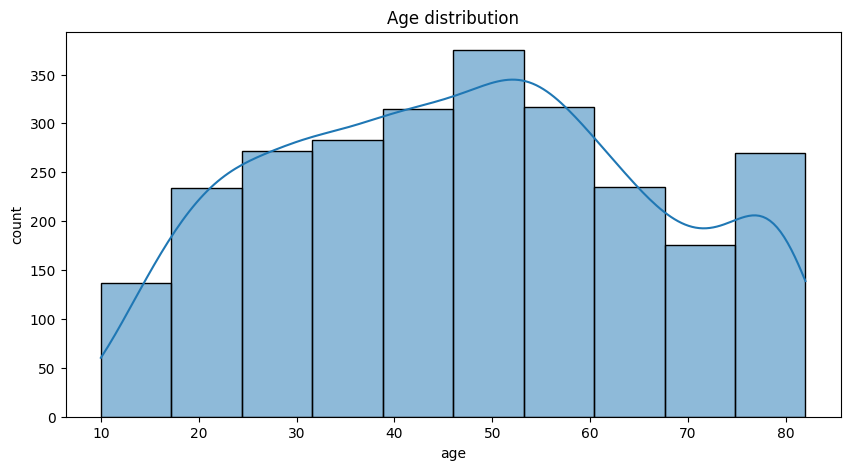

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'],bins=10,kde=True)
plt.title('Age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

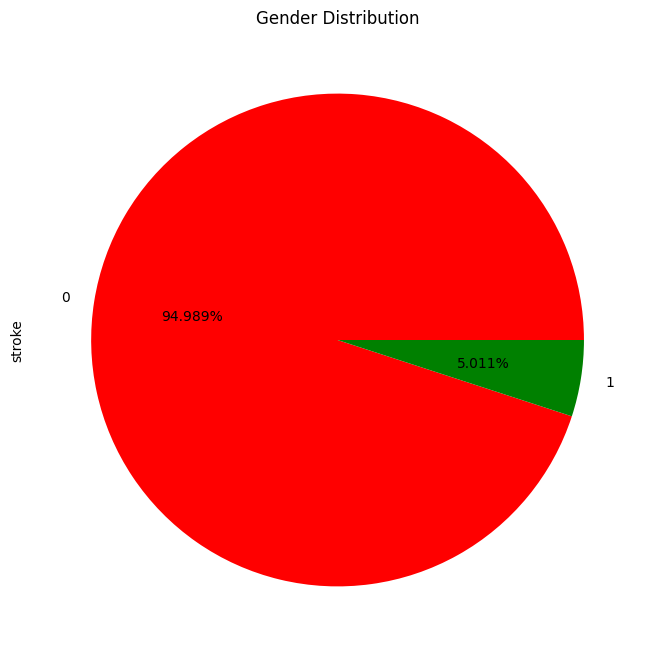

In [ ]:
plt.figure(figsize=(8,8))
df['stroke'].value_counts().plot(kind='pie',autopct='%1.3f%%',colors=['r','g'])
plt.title('Gender Distribution')
plt.show()

 **Encoding categorical values to numerical**

All the machine learning models expect numerical values. We need to
convert the categorical columns to numerical values. We will use
dummy columns.

In [ ]:
df=pd.get_dummies(df,columns=['gender','smoking_status'],drop_first=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,smoking_status_smokes
1,80,0,1,105.92,32.5,1,1,0
2,49,0,0,171.23,34.4,1,0,1
3,79,1,0,174.12,24.0,1,0,0
5,74,1,1,70.09,27.4,1,1,0
6,69,0,0,94.39,22.8,1,0,0
...,...,...,...,...,...,...,...,...
4975,31,0,0,215.07,32.7,0,1,1
4977,40,0,0,191.15,31.1,0,1,1
4978,45,1,0,95.02,31.8,0,0,1
4979,40,0,0,83.94,30.0,0,1,1


In [ ]:
df.dtypes

age                        int64
hypertension               int64
heart_disease              int64
avg_glucose_level        float64
bmi                      float64
stroke                     int64
gender_Male                uint8
smoking_status_smokes      uint8
dtype: object

## **SEPARATING X AND Y**

In [ ]:
#separating input as x and output as y
x = df.drop(['stroke'],axis=1)
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,smoking_status_smokes
1,80,0,1,105.92,32.5,1,0
2,49,0,0,171.23,34.4,0,1
3,79,1,0,174.12,24.0,0,0
5,74,1,1,70.09,27.4,1,0
6,69,0,0,94.39,22.8,0,0
...,...,...,...,...,...,...,...
4975,31,0,0,215.07,32.7,1,1
4977,40,0,0,191.15,31.1,1,1
4978,45,1,0,95.02,31.8,0,1
4979,40,0,0,83.94,30.0,1,1


In [ ]:
y=df['stroke']
y

1       1
2       1
3       1
5       1
6       1
       ..
4975    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 2614, dtype: int64

**TRAIN TEST SPLIT**

A train_test_split function is used for spliting the datasets into a training set and a testing set. The training set is used for
training the model, and the testing set is used to testing the model. This allows us to train the models on the training set,
and then test their accuracy on the unseen testing set.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

**SCALING/ NORMALIZATION**

Normalization in machine learning is the process of translating data into the range [0, 1] (or any other range).

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# **Classification Algorithms**

**1. K-NEAREST NEIGHBOR (KNN)**

* K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.It is used for classification and regression.
* K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K-NN algorithm.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

y_pred1=knn_model.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_pred1,y_test)
print(result)

[[493  23]
 [  6   1]]


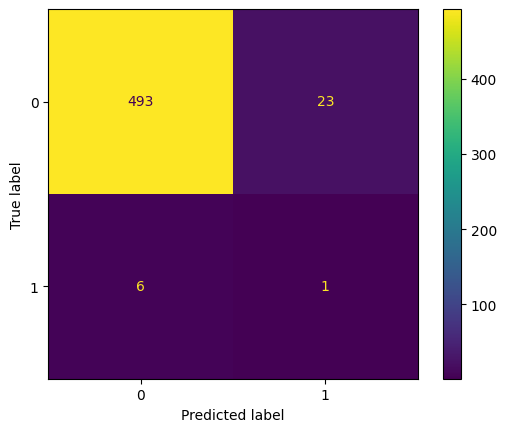

In [ ]:
labels=[0,1]
cmd = ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score

from sklearn.metrics import accuracy_score
a=accuracy_score(y_pred1,y_test)
a

0.9445506692160612

In [ ]:
#classification report

from sklearn.metrics import classification_report

print('Accuracy: ',a*100,'\n')
print(classification_report(y_test,y_pred1))
a=accuracy_score(y_test,y_pred1)

Accuracy:  94.45506692160612 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       499
           1       0.14      0.04      0.06        24

    accuracy                           0.94       523
   macro avg       0.55      0.51      0.52       523
weighted avg       0.92      0.94      0.93       523



In [ ]:
training_score = knn_model.score(x_train,y_train)
training_score

0.9502630320420852

**2.NAIVE BAYES : GAUSSIAN**

*   This type of Naive Bayes is used when variables are continuous in nature.

*   It assumes that all the variables have a normal distribution. So if you have some variables which do not have this property, you might want to transform them to the features having distribution normal.

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(x_train,y_train)
y_pred2 = bayes_model.predict(x_test)
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred2)
print(result)


[[460  39]
 [ 18   6]]


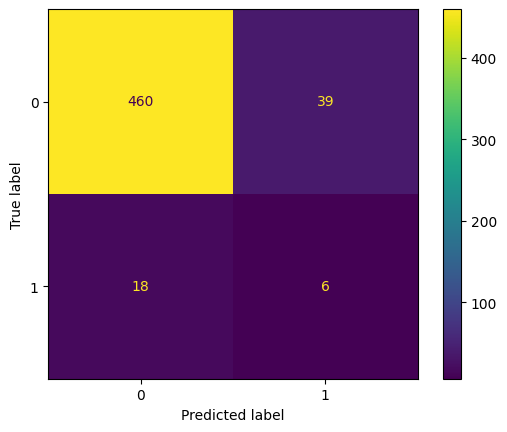

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

b=accuracy_score(y_test,y_pred2)
print('Accuracy: ',b*100,'\n')
print(classification_report(y_test,y_pred2))

Accuracy:  89.10133843212236 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       499
           1       0.13      0.25      0.17        24

    accuracy                           0.89       523
   macro avg       0.55      0.59      0.56       523
weighted avg       0.92      0.89      0.91       523



In [ ]:
training_score = bayes_model.score(x_train,y_train)
training_score

0.8818747010999521

**3) Naive Bayes : BernoulliNB**


*   This is used when features are binary. So instead of using the frequency of the word, if you have discrete features in 1s and 0s that represent the presence or absence of a feature. In that case, the features will be binary and will use Bernoulli Naive Bayes.

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bayes_model1 = BernoulliNB()
bayes_model1.fit(x_train,y_train)
y_pred3 = bayes_model1.predict(x_test)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred3)
print(result)

[[490   9]
 [ 22   2]]


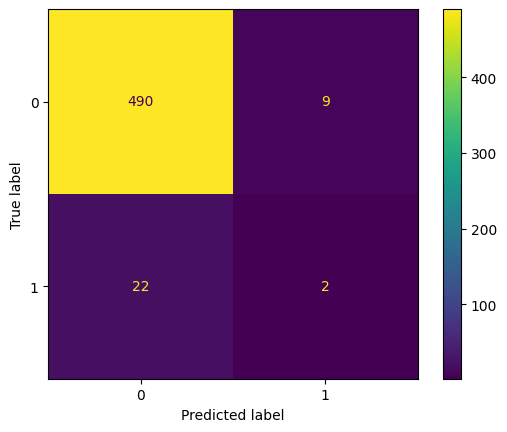

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

c=accuracy_score(y_test,y_pred3)
print('Accuracy: ',c*100,'\n')
print(classification_report(y_test,y_pred3))

Accuracy:  94.07265774378585 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       499
           1       0.18      0.08      0.11        24

    accuracy                           0.94       523
   macro avg       0.57      0.53      0.54       523
weighted avg       0.92      0.94      0.93       523



In [ ]:
training_score = bayes_model1.score(x_train,y_train)
training_score

0.9435676709708274

**4) Support Vector Machine Algorithm**


*   Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems.
*   The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so it is easy to put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [ ]:
from sklearn.svm import SVC
sv_model=SVC()
sv_model.fit(x_train,y_train)
y_pred4=sv_model.predict(x_test)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred4)
print(result)

[[498   1]
 [ 24   0]]


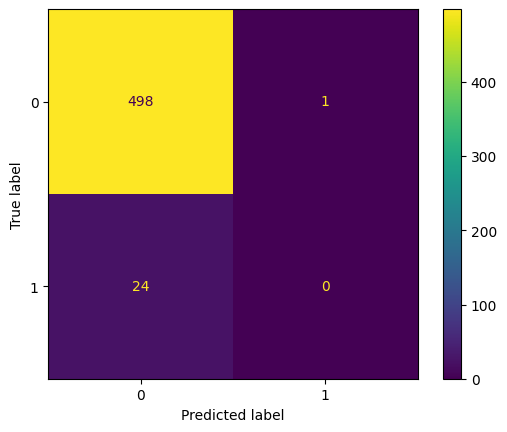

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
# Accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

d=accuracy_score(y_test,y_pred4)
print('Accuracy: ',d*100,'\n')
print(classification_report(y_test,y_pred4))

Accuracy:  95.21988527724665 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       499
           1       0.00      0.00      0.00        24

    accuracy                           0.95       523
   macro avg       0.48      0.50      0.49       523
weighted avg       0.91      0.95      0.93       523



In [ ]:
training_score = sv_model.score(x_train,y_train)
training_score

0.9512195121951219

**5) Decision Tree**

*   A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks.
*   It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier(max_depth = 5,criterion = 'entropy')
tree_model.fit(x_train,y_train)
y_pred5 = tree_model.predict(x_test)
y_pred5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred5)
print(result)

[[498   1]
 [ 24   0]]


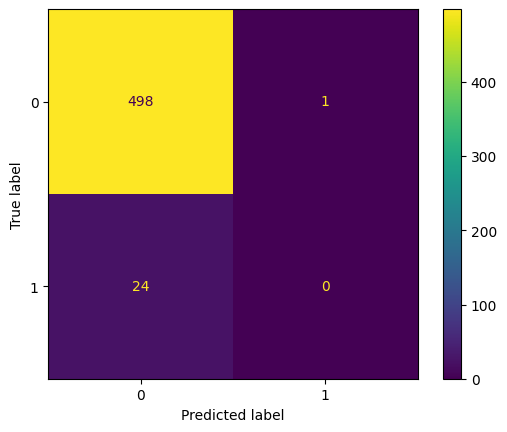

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

e=accuracy_score(y_test,y_pred5)
print('Accuracy: ',e*100,'\n')
print(classification_report(y_test,y_pred5))

Accuracy:  95.21988527724665 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       499
           1       0.00      0.00      0.00        24

    accuracy                           0.95       523
   macro avg       0.48      0.50      0.49       523
weighted avg       0.91      0.95      0.93       523



In [ ]:
training_score = tree_model.score(x_train,y_train)
training_score

0.9531324725011956

**6) Random Forest**

*   Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.


*   For classification tasks, the output of the random forest is the class
    selected by most trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features=5)
forest_model.fit(x_train,y_train)
y_pred6 = forest_model.predict(x_test)
y_pred6

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred6)
print(result)

[[499   0]
 [ 24   0]]


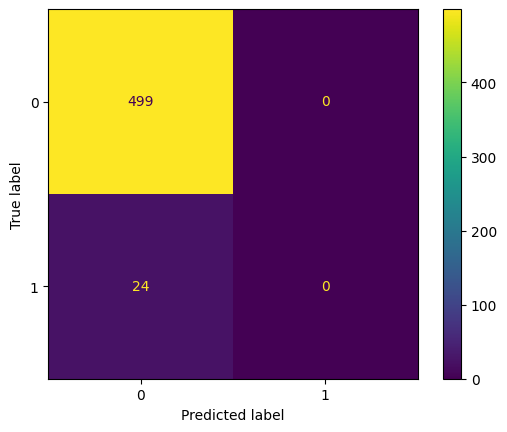

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

f=accuracy_score(y_test,y_pred6)
print('Accuracy: ',f*100,'\n')
print(classification_report(y_test,y_pred6))

Accuracy:  95.41108986615679 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       499
           1       0.00      0.00      0.00        24

    accuracy                           0.95       523
   macro avg       0.48      0.50      0.49       523
weighted avg       0.91      0.95      0.93       523



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
training_score = forest_model.score(x_train,y_train)
training_score

0.9516977522716403

**7) Ada Boost**

*   Ada Boost is an ensemble learning method. We use boosting for combining weak learners with high bias. Boosting aims to produce a model with a lower bias than that of the individual models.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier(n_estimators=10,learning_rate=1.0)
adb_model.fit(x_train,y_train)
y_pred7=adb_model.predict(x_test)
y_pred7

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred7)
print(result)

[[499   0]
 [ 24   0]]


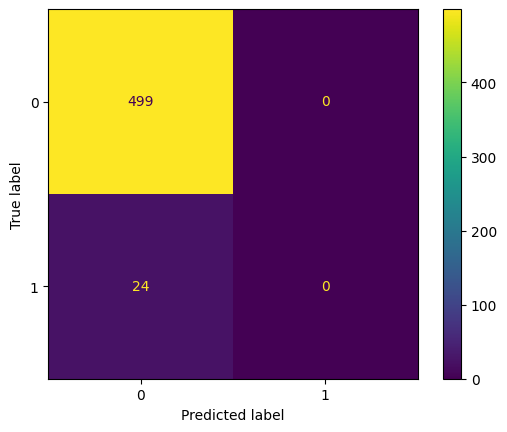

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

g=accuracy_score(y_test,y_pred7)
print('Accuracy: ',g*100,'\n')
print(classification_report(y_test,y_pred7))

Accuracy:  95.41108986615679 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       499
           1       0.00      0.00      0.00        24

    accuracy                           0.95       523
   macro avg       0.48      0.50      0.49       523
weighted avg       0.91      0.95      0.93       523



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
training_score = adb_model.score(x_train,y_train)
training_score

0.9488283118125299

**8) XG Boost**

*   XG Boost is an ensemble learning method. We use boosting for combining weak learners with high bias. Boosting aims to produce a model with a lower bias than that of the individual models.

In [ ]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(x_train,y_train)
y_pred8 = xg_model.predict(x_test)
y_pred8

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred8)
print(result)

[[495   4]
 [ 24   0]]


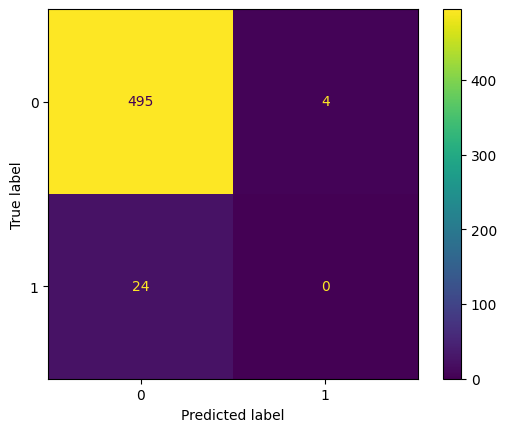

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

h=accuracy_score(y_test,y_pred8)
print('Accuracy: ',h*100,'\n')
print(classification_report(y_test,y_pred8))

Accuracy:  94.64627151051626 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       499
           1       0.00      0.00      0.00        24

    accuracy                           0.95       523
   macro avg       0.48      0.50      0.49       523
weighted avg       0.91      0.95      0.93       523



In [ ]:
training_score = xg_model.score(x_train,y_train)
training_score

1.0

**9) Logistic Regression**

*  Logistic Regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.



*   Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred9 = lr_model.predict(x_test)
y_pred9

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred9)
print(result)

[[499   0]
 [ 23   1]]


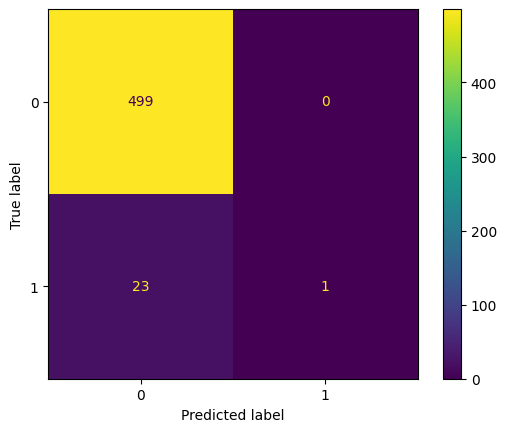

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

i=accuracy_score(y_test,y_pred9)
print('Accuracy: ',i*100,'\n')
print(classification_report(y_test,y_pred9))

Accuracy:  95.60229445506691 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       499
           1       1.00      0.04      0.08        24

    accuracy                           0.96       523
   macro avg       0.98      0.52      0.53       523
weighted avg       0.96      0.96      0.94       523



In [ ]:
training_score = lr_model.score(x_train,y_train)
training_score

0.9488283118125299

<Axes: xlabel='Model', ylabel='Accuracy'>

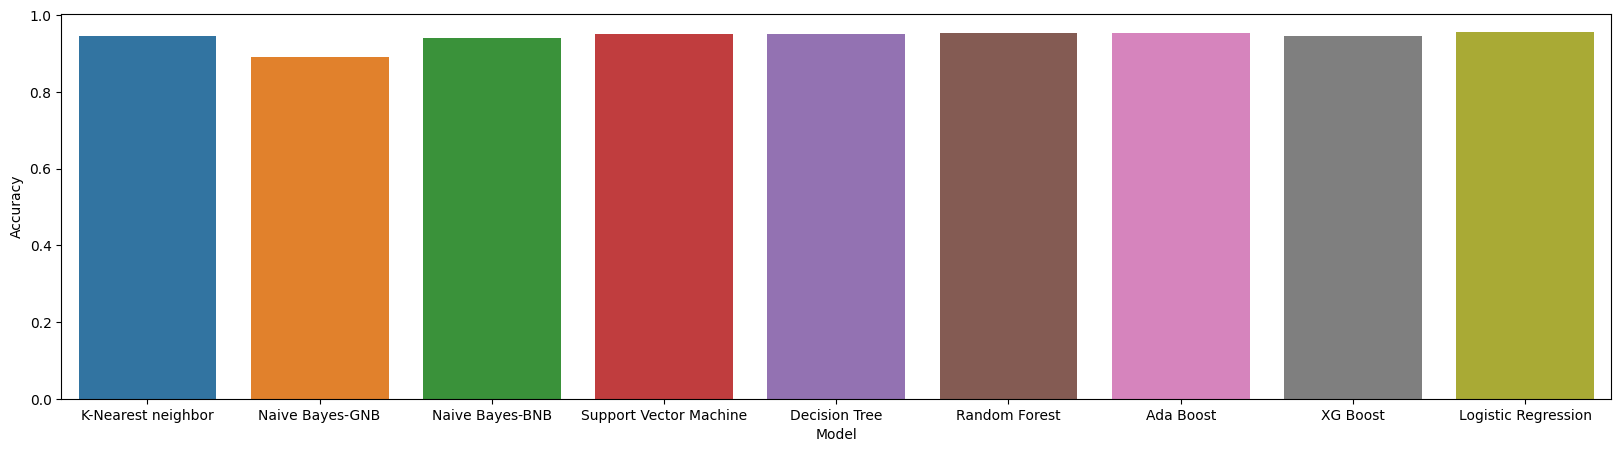

In [ ]:
#accuracy score comparison

plt.figure(figsize=(20,5))
comparison = pd.DataFrame({'Model':['K-Nearest neighbor','Naive Bayes-GNB','Naive Bayes-BNB','Support Vector Machine','Decision Tree','Random Forest','Ada Boost','XG Boost','Logistic Regression'],'Accuracy':[a,b,c,d,e,f,g,h,i]})
sns.barplot(x='Model',y='Accuracy',data=comparison)

**OBSERVATION**

*   Here, we can see that Logistic Regression has the highest accuracy score and f1 score.

# **To check the performance of the Balanced dataset**

**SMOTE-for data balancing-synthetic minority over sampling Technique**

In [ ]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()

x_res,y_res = sm.fit_resample(x,y)

In [ ]:
y.value_counts()

0    2483
1     131
Name: stroke, dtype: int64

In [ ]:
y_res.value_counts()

1    2483
0    2483
Name: stroke, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model1 = LogisticRegression()
lr_model1.fit(x_res,y_res)
y_pred = lr_model1.predict(x_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
print(result)


[[499   0]
 [ 24   0]]


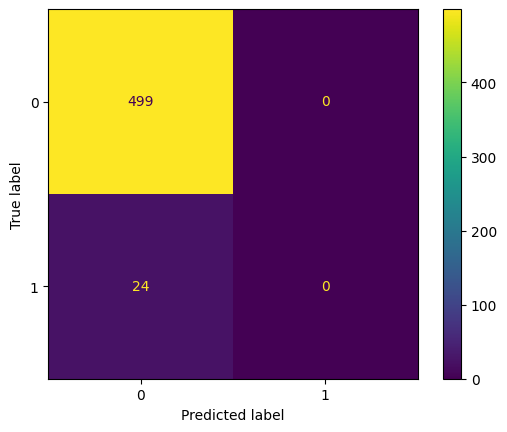

In [ ]:
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

i=accuracy_score(y_test,y_pred)
print('Accuracy: ',i*100,'\n')
print(classification_report(y_test,y_pred))

Accuracy:  95.41108986615679 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       499
           1       0.00      0.00      0.00        24

    accuracy                           0.95       523
   macro avg       0.48      0.50      0.49       523
weighted avg       0.91      0.95      0.93       523



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
training_score = lr_model1.score(x_res,y_res)
training_score

0.765606121627064

**Observation :**

*  In balanced data , there is a slight difference in accuracy data with inbalanced data

# **HYPER PARAMETER TUNING**

*   Hyperparameters (External Parameters) are parameters whose values control the learning process.
 These are adjustable parameters used to obtain an optimal model. .
*   Hyper parameter Tuning refers to the process of choosing the optimum set of hyperparameters for a machine learning model. Here i'am using **RandomSearchCV** to get the optimum set of hyperparameters.


*   In Random Search, the list of hyperparameters are trained and test our model on a random combination of given hyperparameters.

**Applying Hyper Parameter Tuning on Imbalanced Data.**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfc = LogisticRegression()

In [ ]:
param_dist = [{'penalty':['l1','l2','elasticnet','none'],
               'C':np.logspace(-4,4,20),
               'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
               'max_iter':[100,1000,2500,5000]
               }]

In [ ]:
randomCV = RandomizedSearchCV(rfc,param_distributions=param_dist,cv=10)
randomCV.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}])

In [ ]:
randomCV.best_params_

{'solver': 'saga',
 'penalty': 'l1',
 'max_iter': 5000,
 'C': 0.0006951927961775605}

In [ ]:
forest_model3 = LogisticRegression(solver='saga',
 penalty='l1',
 max_iter= 5000,
 C= 0.0006951927961775605)
forest_model3.fit(x_train,y_train)

y_pred_ = forest_model3.predict(x_test)
y_pred_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
training_score = forest_model3.score(x_train,y_train)
training_score

0.9488283118125299

In [ ]:
#accuracy score and classification report

from sklearn.metrics import accuracy_score,classification_report

print('Accuracy: ',accuracy_score(y_test,y_pred_)*100,'\n')
print(classification_report(y_test,y_pred_))

Accuracy:  95.41108986615679 

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       499
           1       0.00      0.00      0.00        24

    accuracy                           0.95       523
   macro avg       0.48      0.50      0.49       523
weighted avg       0.91      0.95      0.93       523



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**OBSERVATION**

*   In this model, the accuracy score is less

### **CONCLUSION**
*   From the performance evaluation given in the classification report, we will get Logistic Regression model has the highest accuracy. F1 and recall scores are also good. Which make  the best model in this case.


*   In the first case, the data set is imbalanced. So observing the performance evaluation we get that accuracy score of the model is slightly high when compared to the balanced data set.




---



# ***`THANK YOU`***